# **LIDL ANALYTICS - CANDY CASE STUDY**
-------------------------------------------------------------------------------------------------------------------------------------------------

##### **INTRODUCTION**

ADASNAJSDASD

#### **DATA AND IMPORTS**

In [42]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
df = pd.read_csv("/Users/florian/Documents/GitHub/candy-data.csv")

In [3]:
df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


#### **ANALYSIS**

**WINPERCENTAGE DISTRIBUTION**

To be able to judge the success of the candies, we first look at the distribution of the winpercentage column in our dataframe and create a barplot to match.

- In order to later have the candy sorted from left to right in descending order, we create a new dataframe where we sort on winpercentage in descending order:

In [14]:
df_winpercent = df.sort_values(by= "winpercent", ascending= False) 

In [74]:
fig = go.Figure()


for product in df_winpercent.competitorname.unique():

 if df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values <= df_winpercent.winpercent.quantile(0.25):
  color = px.colors.qualitative.Prism[7]

  fig.add_trace(
   go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"<25%",
    legendgrouptitle_text = f"≤ 25% qunatile",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>"
   )
  )

 elif df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values <= df_winpercent.winpercent.quantile(0.50):
  color= px.colors.qualitative.Prism[5]


  fig.add_trace(
   go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"≤50%",
    legendgrouptitle_text = f"≤50% qunatile",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>"
   )
  )
 
 elif df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values <= df_winpercent.winpercent.quantile(0.75):
  color= px.colors.qualitative.Prism[4]


  fig.add_trace(
    go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"≤75%",
    legendgrouptitle_text = f"≤75% quantile",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>"
    )
  )

 elif df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values < df_winpercent.winpercent.max():
  color= px.colors.qualitative.Prism[3]
  text= f"{df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(1)}"

  fig.add_trace(
    go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"<max",
    text= text,
    legendgrouptitle_text = f"< max",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>" 
    )
  )

 else:
  color = px.colors.qualitative.Prism[3]
  text= f"{df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(1)}"
  
  fig.add_trace(
    go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color),
    width= 0.8,
    legendgroup= f"max",
    text= text,
    legendgrouptitle_text = f"winner",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>" 
    )
  )


quantile_lines= [0.25, 0.5, 0.75]

for quantile in quantile_lines:

 fig.add_hline(
  y= df_winpercent.winpercent.quantile(quantile),
  opacity= 0.5,
  line_dash= "dash",
  line_color= "white",
  annotation_text= f"{quantile*100}% quantile",
  annotation_position= "top right",
  annotation_font_size= 13,
  annotation_font_color= "white"
 )


fig.update_layout(title= dict(text= "<b>Reese's Peanut Butter Cup has highest winpercent with 84.18%</b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.935, x=0.475), legend_title_text = "<b>products by winpercent quantile</b>", height= 800)
fig.update_xaxes(title_text="<b>products</b>", ticks= "outside", showline= False)
fig.update_yaxes(title_text="<b>winpercent</b>", ticks= "outside", showgrid= True, gridcolor= "white", showline= False)
fig.update_layout(xaxis= dict(linecolor= "white"), yaxis= dict(linecolor= "white"), paper_bgcolor= "rgba(0,0,0,0)", plot_bgcolor= "rgba(0,0,0,0)", font_color= "white")

fig.show()

**TOP TEN & WORST TEN**  

Let's look at which candies perform the best and which perform the worst. We will create two new dataframes in advance for later plotting.

In [10]:
df_winner = df.sort_values(by= "winpercent", ascending= False).head(10)
df_loser = df.sort_values(by= "winpercent", ascending= False).tail(10)

In [5]:
df_winner

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [11]:
df_loser

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341


In order to get a better picture, we will plot the winpercentage of each candy in a barplot and take our already created dataframes for the best and worst 10.

In [75]:
fig_top = go.Figure()

for winner in df_winner.competitorname.values:
    fig_top.add_trace(
        go.Bar(
            x= df_winner.loc[df_winner.competitorname == winner].competitorname.values,
            y= df_winner.loc[df_winner.competitorname == winner].winpercent.values,
            name= f"{winner} | {df_winner.loc[df_winner.competitorname == winner].winpercent.values[0].round(3)}%",
            showlegend= True,
            marker= dict(color= px.colors.sequential.speed[8]),
            width= 0.8,
            legendgroup= f"{winner}",
            text= f"{df_winner.loc[df_winner.competitorname == winner].winpercent.values[0].round(1)}",
            hovertemplate = f"<b>{winner}</b><br><br>" +
                "Win%: %{y}<br>" +
                "<extra></extra>" 
        )
    )

for loser in df_loser.competitorname.values:
    fig_top.add_trace(
        go.Bar(
            x= df_loser.loc[df_loser.competitorname == loser].competitorname.values,
            y= df_loser.loc[df_loser.competitorname == loser].winpercent.values,
            name= f"{loser} | {df_loser.loc[df_loser.competitorname == loser].winpercent.values[0].round(3)}%",
            showlegend= True,
            marker= dict(color= px.colors.sequential.amp[8]),
            width= 0.8,
            legendgroup= f"{loser}",
            text= f"{df_loser.loc[df_loser.competitorname == loser].winpercent.values[0].round(1)}",
            hovertemplate = f"<b>{loser}</b><br><br>" +
                "Win%: %{y}<br>" +
                "<extra></extra>" 
        )
    )


fig_top.update_layout(title= dict(text= "<b>Top 10 & Worse 10</b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.935, x=0.475), legend_title_text = "<b>products by winpercentage performance</b>", height= 850)
fig_top.update_xaxes(title_text="<b>products</b>", ticks= "outside", showline= False)
fig_top.update_yaxes(title_text="<b>winpercent %</b>", ticks= "outside", showgrid= True, gridcolor= "lightgrey", showline= False)
fig_top.update_layout(paper_bgcolor= "rgba(0,0,0,0)", plot_bgcolor= "rgba(0,0,0,0)", font_color= "white")

fig_top.show()

In [39]:
df_winner.loc[df_winner.chocolate == 1]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [35]:
df_winner.sum()[1:10]

chocolate           10
fruity               0
caramel              3
peanutyalmondy       7
nougat               2
crispedricewafer     2
hard                 0
bar                  5
pluribus             2
dtype: object

You can see Reese's Peanut Butter Cup scores the best with this at 1 and Nik L Nip scores the worst. Looking at the names of the best 10 sweets, one can already assume that chocolate could be a decisive factor for the success of a candy. So let's take a closer look at the ingredients.

- Therefore we group the dataframe on an ingredient of our products and look at how the products perform that contain it and those that do not.

**CHARAKTERISTICS**

In [16]:
# chocolate
df.groupby("chocolate").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,chocolate,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.452937,0.343021,42.142257,48
1,1,0.512000,0.632162,60.921529,37


In [18]:
# fruity
df.groupby("fruity").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,fruity,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.487340,0.578957,55.327122,47
1,1,0.467895,0.332737,44.119741,38


In [19]:
# caramel
df.groupby("caramel").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,caramel,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.450944,0.436803,48.930538,71
1,1,0.619143,0.631571,57.346908,14


In [20]:
# peanutyalmondy
df.groupby("peanutyalmondy").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,peanutyalmondy,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.467676,0.429887,47.678380,71
1,1,0.534286,0.666643,63.697137,14


In [21]:
# nougat
df.groupby("nougat").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,nougat,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.468282,0.455846,49.443100,78
1,1,0.594143,0.614143,60.051879,7


In [22]:
# crispedricewafer
df.groupby("crispedricewafer").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,crispedricewafer,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.472756,0.440949,48.894015,78
1,1,0.544286,0.780143,66.170252,7


In [23]:
# hard
df.groupby("hard").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,hard,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.4667,0.501014,52.418431,70
1,1,0.5344,0.318933,40.508982,15


In [24]:
# bar
df.groupby("bar").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,bar,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.462547,0.384531,46.714395,64
1,1,0.527714,0.725952,61.295413,21


In [26]:
# pluribus
df.groupby("pluribus").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,pluribus,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.46539,0.533854,54.066404,41
1,1,0.49100,0.408341,46.822781,44


We recognize that the sweets with the characteristics chocolate, caramel, peanutyalmondy, (nougat), (crispedricewafer) and bar perform better and products with the characteristics fruity, hard and pluribus perform worse. 

- (): We counted the rows to get a sense of whether our results are significant, characteristics with () contain too few data points to classify as significant.

Next we look at the characteristics in a boxplot:


In [77]:
fig_box = make_subplots(cols=3, rows= 1, horizontal_spacing= 0.1, subplot_titles= ("chocolate", "caramel", "peanutyalmondy"))


fig_box.add_trace(
 go.Box(
      name= f"chocolate",
      x= df.chocolate,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.speed[7],
      hoveron = "boxes+points",
 ),
 col= 1,
 row= 1
)

fig_box.add_trace(
 go.Box(
      name= f"caramel",
      x= df.caramel,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.speed[6],
      hoveron = "boxes+points",
 ),
 col= 2, 
 row= 1
)

fig_box.add_trace(
 go.Box(
      name= f"peanutyalmondy",
      x= df.peanutyalmondy,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.speed[8],
      hoveron = "boxes+points",
 ),
 col= 3, 
 row= 1
)

# update layout 
fig_box.update_layout(
     title= dict(text= "<b>GOOD CHARACTERISTICS<b>",font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>product ingredients</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

# update axes
fig_box.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), col=1, row=1)
fig_box.update_xaxes(title_text="<b>product ingredients</b>", title_font= dict(size= 14), col=2, row= 1)
fig_box.show()

In [78]:
fig_box1 = make_subplots(cols=3, rows= 1, horizontal_spacing= 0.1, subplot_titles= ("fruity", "hard", "pluribus"))


fig_box1.add_trace(
 go.Box(
      name= f"fruity",
      x= df.fruity,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.amp[8],
      hoveron = "boxes+points",
 ),
 col= 1,
 row= 1
)

fig_box1.add_trace(
 go.Box(
      name= f"hard",
      x= df.hard,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.amp[7],
      hoveron = "boxes+points",
 ),
 col= 2, 
 row= 1
)

fig_box1.add_trace(
 go.Box(
      name= f"pluribus",
      x= df.pluribus,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.amp[6],
      hoveron = "boxes+points",
 ),
 col= 3, 
 row= 1
)

# update layout 
fig_box1.update_layout(
     title= dict(text= "<b>BAD CHARACTERISTICS<b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>product ingredients</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

# update axes
fig_box1.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), col=1, row=1)
fig_box1.update_xaxes(title_text="<b>product ingredients</b>", title_font= dict(size= 14), col=2, row= 1)
fig_box1.show()

So we finally realize that the products having the characteristics chocolate, caramel, peanutyalmondy perform significantly better and products having the characteristics fruity, hard, pluribus perform significantly worse. 

**CORRELATION**

Next we look at the correlation of the attributes in the dataframe.
For this we plot it in a heatmap.

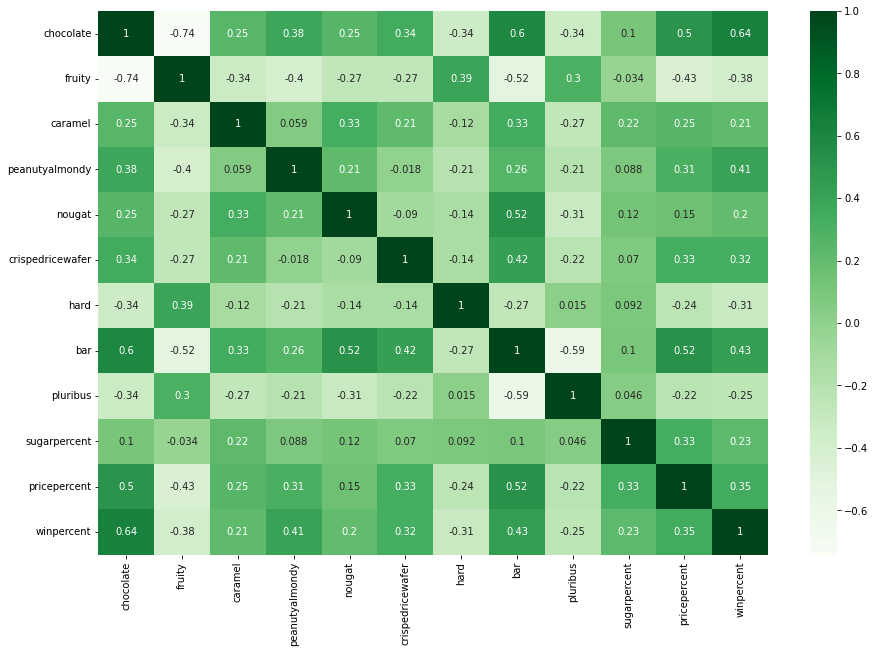

In [41]:
fig_corr = plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), cmap= "Greens", annot= True)
fig_corr.savefig("corr_map.png", transparent= True)

We recognize the correlation already established above between chocolate, caramel, peanutyalmondy and winpercent. Now we check their p-value to prove the significance of our observed correlation:

In [43]:
print(linregress(df.chocolate, df.winpercent))
print(linregress(df.caramel, df.winpercent))
print(linregress(df.peanutyalmondy, df.winpercent))
print(linregress(df.bar, df.winpercent))

LinregressResult(slope=18.77927240540544, intercept=42.142256999999994, rvalue=0.6365167485397073, pvalue=5.859698106039011e-11, stderr=2.4976541943911545, intercept_stderr=1.6478728876096413)
LinregressResult(slope=8.416369460764596, intercept=48.930538253521135, rvalue=0.2134162955676798, pvalue=0.049864431705954324, stderr=4.2289792318294985, intercept_stderr=1.7162877682933382)
LinregressResult(slope=16.018756377263593, intercept=47.678380408450714, rvalue=0.40619220218098295, pvalue=0.0001147207635657216, stderr=3.955518856976342, intercept_stderr=1.6053066849763733)
LinregressResult(slope=14.58101794717261, intercept=46.71439467187501, rvalue=0.42992932818934837, pvalue=4.0186353452792626e-05, stderr=3.361037533844676, intercept_stderr=1.6706041153961144)


**BEST COMBINATIONS**

Above we have established interrelationships and correlations of characteristics. We have only ever looked at these in isolation. However, these are usually present together.  Therefore, we now want to look for the best combination of these to maximize our winpercentage.

In [55]:
table1 = df.pivot_table(
 values= ["winpercent"],
 columns= ["chocolate", "peanutyalmondy", "caramel"],
 aggfunc= dict(winpercent= "mean")
)

table2 = df.pivot_table(
 values= ["winpercent"],
 columns= ["chocolate", "peanutyalmondy"],
 aggfunc= dict(winpercent= "mean"),
 fill_value= 0
)

table3 = df.pivot_table(
 values= ["winpercent"],
 columns= ["chocolate", "caramel"],
 aggfunc= dict(winpercent= "mean"),
 fill_value= 0
)

table4 = df.pivot_table(
 values= ["winpercent"],
 columns= ["peanutyalmondy", "caramel"],
 aggfunc= dict(winpercent= "mean"),
 fill_value= 0
)

In [56]:
table1

chocolate               0                                1             \
peanutyalmondy          0                     1          0              
caramel                 0          1          0          0          1   
winpercent      43.119604  35.522633  34.857211  53.577917  66.806942   

chocolate                             
peanutyalmondy          1             
caramel                 0          1  
winpercent      69.880879  64.372527

In [57]:
pd.concat([table2, table3, table4], sort= True, axis=0)

0                     1           
                    0          1          0          1
winpercent  42.458998  34.857211  57.282044  68.503791
winpercent  42.744041  35.522633  59.012238  66.076617
winpercent  46.257098  55.430830  63.512940  64.372527

We recognize that products with chocolate and peanutyalmondy but without caramel have the best winpercentage and therefore the best combination of characteristics.

#### **MACHINE LEARNING** 

In our analysis earlier, we took a closer look at the data and found correlations. Based on this, we now want to create smaller machine learning algorithms that will allow us to predict the classification and regression of some attributes.

**FEATURE IMPORTANCE**

Let's first take a look at the weighting of our features. We use Principal Component Analysis to determine the variance that each feature explains.

In [61]:
from sklearn.decomposition import PCA

In [59]:
X = df.drop(["competitorname"], axis= 1)

In [62]:
pc = PCA()
pc.fit(X)

PCA()

In [63]:
df_pca = pd.DataFrame(pc.explained_variance_ratio_)

In [65]:
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


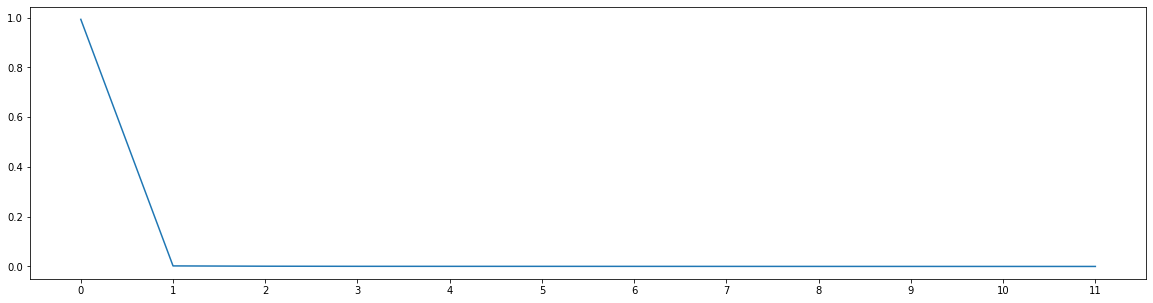

In [64]:
plt.figure(figsize= (20, 5))
plt.plot(df_pca)
plt.xticks(df_pca.index)
plt.show()

In [67]:
X.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [66]:
pc.explained_variance_

array([2.16768672e+02, 4.93376209e-01, 2.28118989e-01, 1.39067582e-01,
       1.20000939e-01, 1.12987619e-01, 9.45445030e-02, 7.51682793e-02,
       5.67693343e-02, 4.59438204e-02, 3.39804902e-02, 2.35025405e-02])

**CLASSIFICATION**

We have established above that chocolate is one of the most important attributes for the prediction of the winpercentage. But now we want to turn the tables and try to classify whether a product contains chocolate.

- lets split our data in train and tests sets first

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [68]:
df_clf = df.copy()

In [69]:
X = df_clf.drop(["chocolate", "competitorname"], axis= 1)
y = df_clf["chocolate"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state=0)

Since we want to try out several alogrithms, we first create a basic model and then try to improve it. Since we want to try out several alogrithms, we first create a basic model and then try to improve it. At the same time we want to find the best parameters for the most accurate model. We do this with a 10-fold cross validation using GridSearch.

- as a basic model we take a normal decision tree

DecisionTree (Basemodell):

In [ ]:
dtc_cv = GridSearchCV(
 estimator= DecisionTreeClassifier(),
 param_grid= dict(min_samples_split= [2, 10, 20, 50], max_depth= [1, 3, 6, 9], random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 cv= 10
).fit(X_train, y_train)

print(f"Best param: {dtc_cv.best_params_} with best acc-score: {dtc_cv.best_score_}")

In [ ]:
best_dtc = DecisionTreeClassifier(max_depth= 3, min_samples_split= 10, random_state= 0).fit(X_train, y_train)

y_pred_train_best_dtc = best_dtc.predict(X_train)
y_pred_test_best_dtc = best_dtc.predict(X_test)

print(classification_report(y_test, y_pred_test_best_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_dtc, cmap= "Greens"))

We achieve 87% accuracy on our test data. Now we try to improve this value a little bit. For this we use mehtodes from the ensemble of sklearn.

Gradient Boosting:

In [ ]:
gbc_cv = GridSearchCV(
 estimator= GradientBoostingClassifier(),
 param_grid= dict(learning_rate= [0.001, 0.01, 0.1], max_depth= [1,3,5,9], random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 ).fit(X_train, y_train)
 
print(f"Best parameters: {gbc_cv.best_params_}, with best acc-score: {gbc_cv.best_score_}")

In [ ]:
best_gbc = GradientBoostingClassifier(max_depth= 1, random_state= 0, learning_rate= 0.1).fit(X_train, y_train)

y_pred_train_best_gbc = best_gbc.predict(X_train)
y_pred_test_best_gbc = best_gbc.predict(X_test)

print(classification_report(y_test, y_pred_test_best_gbc))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_gbc, cmap= "Greens"))

Random Forest:

In [ ]:
rfc_cv = GridSearchCV(
 estimator= RandomForestClassifier(),
 param_grid= dict(n_estimators= [100, 150, 300], criterion= ["gini", "entropy"], max_features= [3, 5, 11], random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 ).fit(X_train, y_train)
 
print(f"Best parameters: {rfc_cv.best_params_}, with best acc-score: {rfc_cv.best_score_}")

In [ ]:
best_rfc = RandomForestClassifier(random_state= 0, criterion= "gini", max_features= 3, n_estimators= 150).fit(X_train, y_train)

y_pred_train_best_rfc = best_rfc.predict(X_train)
y_pred_test_best_rfc = best_rfc.predict(X_test)

print(classification_report(y_test, y_pred_test_best_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_rfc, cmap= "Greens"))

In [ ]:
y_predict= [
 [best_dtc, y_pred_test_best_dtc, "DecisionTreeClassifier"],
 [best_gbc, y_pred_test_best_gbc, "GradientBoostingClassifier"],
 [best_rfc, y_pred_test_best_rfc, "RandomForestClassifier"]
]


plt.figure(figsize= (20,10))
    
for model in y_predict:
 fpr, tpr, thr = roc_curve(y_test, model[0].predict_proba(X_test)[:,1])
 auc = roc_auc_score(y_test, model[1])
 plt.step(x=fpr, y=tpr, label=f"{model[2]} (AUC = {auc.round(2)})")

 plt.legend()

As we can see, our baseline model performs the best.

**REGRESSION**

Let us now try to predict the winpercentage with our data by regression